In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import *


In [238]:
# Load the CSV file into a DataFrame
df1 = pd.read_csv('data_1372.csv')
df1.drop('Unnamed: 0', axis=1, inplace=True)
df1

,A,B,C,D,E,F
0,1.235291,-1.134355,1.093103,-0.005897,-0.107156,0.186237
1,-0.024436,0.006688,2.043630,0.079189,0.114786,0.492908
2,6.275028,-0.860554,2.998722,1.724061,1.331363,2.749730
3,2.915105,0.495306,-0.022185,-0.386030,0.776131,1.625773
4,-1.490919,-1.391907,2.958764,-0.100572,-1.006085,3.835835
5,0.544409,0.411473,2.819194,-1.000794,0.814224,2.360125
6,0.098989,2.392594,2.735245,-0.622818,1.148119,1.552665
7,0.791651,0.809234,3.117479,0.018088,0.042586,0.643492
8,-1.719385,1.866135,3.832342,-0.207879,1.135067,3.115843
9,0.199790,1.691753,2.638764,-0.251614,0.203312,0.650563


          A         B         C         D         E         F
A  1.000000 -0.327166 -0.323905  0.690829  0.447305 -0.076234
B -0.327166  1.000000  0.268803 -0.467179  0.520850 -0.161197
C -0.323905  0.268803  1.000000  0.129931  0.107953  0.448316
D  0.690829 -0.467179  0.129931  1.000000  0.134405  0.116390
E  0.447305  0.520850  0.107953  0.134405  1.000000  0.102377
F -0.076234 -0.161197  0.448316  0.116390  0.102377  1.000000


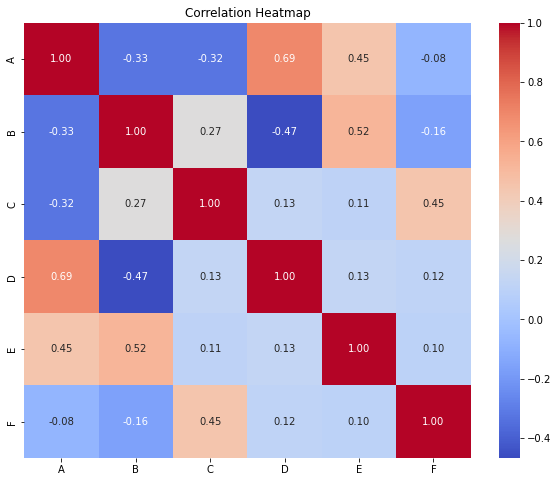

In [239]:
correlation_matrix1 = df1.corr()

print(correlation_matrix1)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [240]:
df2 = pd.read_csv('data_1394.csv')
df2.drop('Unnamed: 0', axis=1, inplace=True)
df2

,A,B,C,D,E,F
0,-0.433350,-2.041374,2.491330,1.093051,0.882626,3.484597
1,4.071383,-1.767905,3.719607,-0.006225,-0.111798,-0.416523
2,1.389708,-1.776859,2.193749,-0.318173,-0.698993,-0.376650
3,0.402491,1.503517,2.121959,-0.756075,-0.888215,1.387117
4,-1.634332,1.564276,2.890794,0.024334,-0.240630,2.054705
5,2.344993,-0.382027,1.377063,0.001807,-0.066641,-0.501381
6,-0.344654,4.098284,2.713674,-0.081554,-1.055711,2.286840
7,-0.389532,0.455122,-0.082094,0.028980,0.882793,0.829275
8,-0.722635,0.407176,2.968925,1.381289,-1.161706,3.908815
9,4.161282,0.328259,3.373359,-0.247891,0.841082,1.772833


          A         B         C         D         E         F
A  1.000000 -0.412637  0.322408 -0.363648  0.261948 -0.589319
B -0.412637  1.000000 -0.035155 -0.262259 -0.423742  0.308663
C  0.322408 -0.035155  1.000000  0.134930 -0.269844  0.253870
D -0.363648 -0.262259  0.134930  1.000000  0.071568  0.670134
E  0.261948 -0.423742 -0.269844  0.071568  1.000000 -0.061871
F -0.589319  0.308663  0.253870  0.670134 -0.061871  1.000000


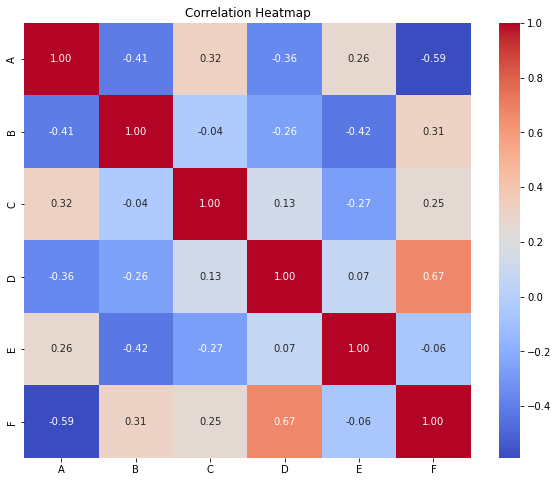

In [241]:
correlation_matrix2 = df2.corr()

print(correlation_matrix2)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [242]:
df3 = pd.read_csv('data_1372.csv')
df3.drop('Unnamed: 0', axis=1, inplace=True)
df3

,A,B,C,D,E,F
0,1.235291,-1.134355,1.093103,-0.005897,-0.107156,0.186237
1,-0.024436,0.006688,2.043630,0.079189,0.114786,0.492908
2,6.275028,-0.860554,2.998722,1.724061,1.331363,2.749730
3,2.915105,0.495306,-0.022185,-0.386030,0.776131,1.625773
4,-1.490919,-1.391907,2.958764,-0.100572,-1.006085,3.835835
5,0.544409,0.411473,2.819194,-1.000794,0.814224,2.360125
6,0.098989,2.392594,2.735245,-0.622818,1.148119,1.552665
7,0.791651,0.809234,3.117479,0.018088,0.042586,0.643492
8,-1.719385,1.866135,3.832342,-0.207879,1.135067,3.115843
9,0.199790,1.691753,2.638764,-0.251614,0.203312,0.650563


          A         B         C         D         E         F
A  1.000000 -0.327166 -0.323905  0.690829  0.447305 -0.076234
B -0.327166  1.000000  0.268803 -0.467179  0.520850 -0.161197
C -0.323905  0.268803  1.000000  0.129931  0.107953  0.448316
D  0.690829 -0.467179  0.129931  1.000000  0.134405  0.116390
E  0.447305  0.520850  0.107953  0.134405  1.000000  0.102377
F -0.076234 -0.161197  0.448316  0.116390  0.102377  1.000000


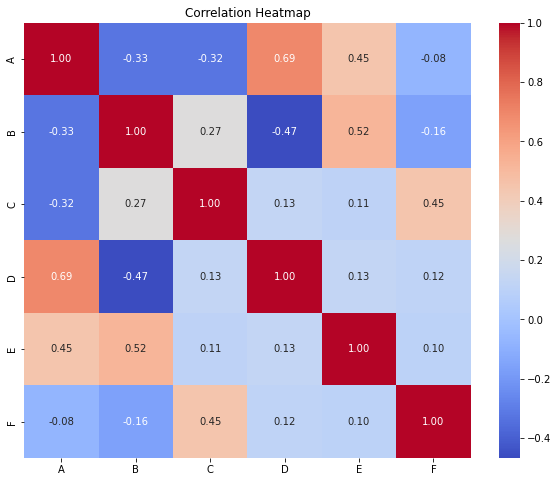

In [243]:
correlation_matrix3 = df3.corr()

print(correlation_matrix3)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [244]:
df4 = pd.read_csv('data_1400.csv')
df4.drop('Unnamed: 0', axis=1, inplace=True)
df4

,A,B,C,D,E,F
0,-3.130443,2.396879,0.870341,0.140634,-0.826904,4.005538
1,4.535687,-0.036950,1.374127,0.049399,-0.167118,1.042950
2,0.706033,-0.686432,1.994070,-0.067567,-0.063639,0.836092
3,0.651121,1.699051,2.674673,0.843057,-0.973428,1.081626
4,1.587271,0.255677,3.821490,-0.076947,-0.026412,1.080240
5,2.130904,1.092635,2.910873,-0.157400,1.045424,2.921297
6,0.070931,0.674804,-0.567133,-0.758706,0.806708,2.835852
7,1.629202,3.041310,3.924395,0.585269,0.723536,0.375938
8,0.619065,1.721586,2.624070,0.200001,0.250848,0.210735
9,-3.533632,2.045461,2.734416,0.003144,-1.530798,5.395115


          A         B         C         D         E         F
A  1.000000 -0.474230  0.185777  0.047562  0.588299 -0.731365
B -0.474230  1.000000  0.259037  0.510009 -0.167715  0.252884
C  0.185777  0.259037  1.000000  0.586434 -0.017444 -0.326100
D  0.047562  0.510009  0.586434  1.000000 -0.367234 -0.365852
E  0.588299 -0.167715 -0.017444 -0.367234  1.000000 -0.439119
F -0.731365  0.252884 -0.326100 -0.365852 -0.439119  1.000000


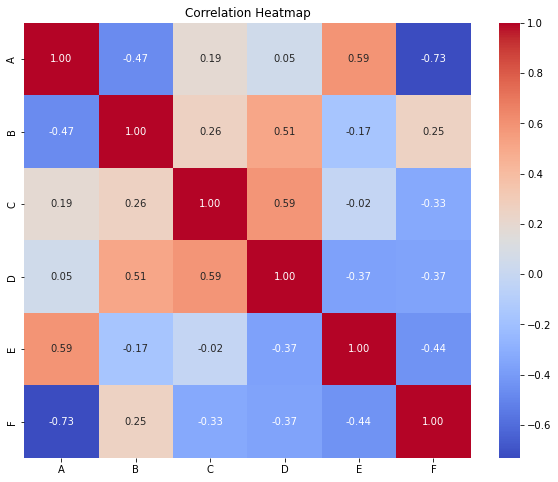

In [245]:
correlation_matrix4 = df4.corr()

print(correlation_matrix4)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [246]:
df5 = pd.read_csv('data_1474.csv') 
df5.drop('Unnamed: 0', axis=1, inplace=True)
df6 = pd.read_csv('data_1476.csv') 
df6.drop('Unnamed: 0', axis=1, inplace=True)    
df = df1.append(df2)
df = df.append(df3)
df = df.append(df4)
df = df.append(df5)
df = df.append(df6)
df

C:\Users\nunni\AppData\Local\Temp\ipykernel_20044\2469777790.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)
C:\Users\nunni\AppData\Local\Temp\ipykernel_20044\2469777790.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3)
C:\Users\nunni\AppData\Local\Temp\ipykernel_20044\2469777790.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df4)
C:\Users\nunni\AppData\Local\Temp\ipykernel_20044\2469777790.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df5)
C:\Users\nunni\AppData\Local\Temp\ipykernel_20044\2469777790.py:9: FutureWarning: The frame.append method is de

,A,B,C,D,E,F
0,1.235291,-1.134355,1.093103,-0.005897,-0.107156,0.186237
1,-0.024436,0.006688,2.043630,0.079189,0.114786,0.492908
2,6.275028,-0.860554,2.998722,1.724061,1.331363,2.749730
3,2.915105,0.495306,-0.022185,-0.386030,0.776131,1.625773
4,-1.490919,-1.391907,2.958764,-0.100572,-1.006085,3.835835
...,...,...,...,...,...,...
195,-0.988265,1.925893,3.275051,-1.248338,1.507127,3.528870
196,-1.263968,0.509510,2.693519,0.071779,0.578281,2.043696
197,1.967642,-0.053140,3.794566,0.083725,-0.943744,1.409918
198,-1.287590,2.005872,3.182230,0.961767,-1.107411,3.408313


          A         B         C         D         E         F
A  1.000000 -0.386796 -0.099708  0.061528  0.193196 -0.519604
B -0.386796  1.000000  0.405473 -0.035791 -0.102583  0.107952
C -0.099708  0.405473  1.000000  0.011331 -0.047585  0.059029
D  0.061528 -0.035791  0.011331  1.000000 -0.025769  0.024501
E  0.193196 -0.102583 -0.047585 -0.025769  1.000000 -0.075610
F -0.519604  0.107952  0.059029  0.024501 -0.075610  1.000000


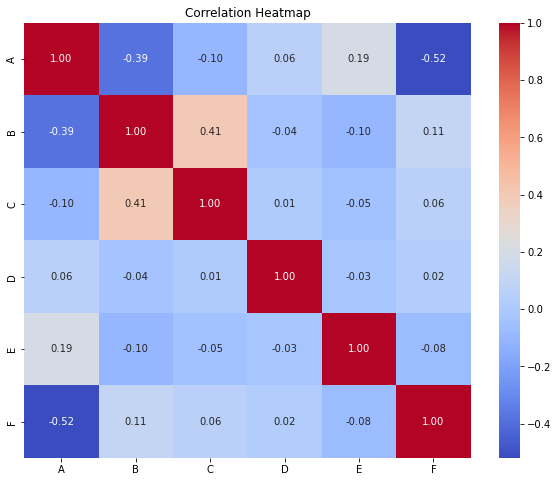

In [247]:
correlation_matrix = df.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

Mutual Information between A and B: 0.5179767341847551
Mutual Information between xn and yn1: 0.6621445172754411


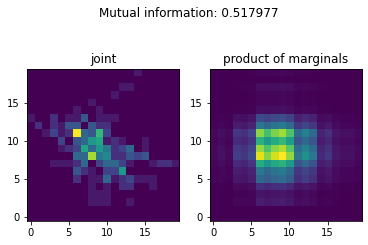

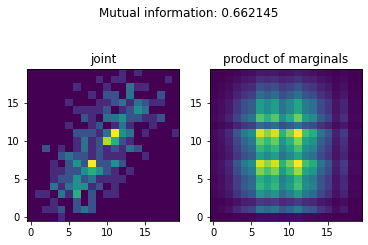

In [248]:
def MI(x, y, Nbins=21):
    bins = np.linspace(np.min(x), np.max(x), Nbins)
    eps = np.spacing(1)
    x_marginal = np.histogram(x, bins=bins)[0]
    x_marginal = x_marginal / x_marginal.sum()
    y_marginal = np.histogram(y, bins=bins)[0]
    y_marginal = y_marginal / y_marginal.sum()
    xy_joint = np.histogram2d(x, y, bins=(bins, bins))[0]
    xy_joint = xy_joint / xy_joint.sum()

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(xy_joint.T, origin='lower')
    plt.title('joint')
    plt.subplot(1, 2, 2)
    plt.imshow((x_marginal[:, None] * y_marginal[None, :]).T, origin='lower')
    plt.title('product of marginals')
    MI_value = np.sum(xy_joint * np.log(xy_joint / (x_marginal[:, None] * y_marginal[None, :] + eps) + eps))
    plt.suptitle('Mutual information: %f' % MI_value)
    return MI_value

# Assuming df is your DataFrame with columns A, B, C, D, E, F
x = df['A']
y = df['B']
MI_value = MI(x, y)
print("Mutual Information between A and B:", MI_value)

# Example with random data
xn = np.random.randn(len(x))
yn = np.random.randn(len(x))
yn1 = xn + yn
MI_value_random = MI(xn, yn1)
print("Mutual Information between xn and yn1:", MI_value_random)

A virker central - har høj correlation med alle undtagen C

In [249]:
df['A'].mean()

0.3629332258322082

Intervention: A = 1

In [250]:
df_A = pd.read_csv('data_1403.csv')
df_A1 = pd.read_csv('data_1477.csv')
df_A = df_A.append(df_A1)
df_A.drop('Unnamed: 0', axis=1, inplace=True)
df_A

C:\Users\nunni\AppData\Local\Temp\ipykernel_20044\2584698911.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_A = df_A.append(df_A1)


,A,B,C,D,E,F
0,1.0,0.924515,3.096279,-0.013630,-0.284283,-0.498608
1,1.0,-1.182831,0.228595,-0.112492,-0.268401,1.691730
2,1.0,0.828006,2.395470,-0.089796,0.055045,1.493439
3,1.0,-1.238862,2.815715,0.100369,-1.045953,1.650546
4,1.0,-0.689955,-0.466644,-0.334354,0.108129,-0.532227
...,...,...,...,...,...,...
195,1.0,-0.520249,3.406347,-1.878233,1.042784,1.232869
196,1.0,3.790454,2.819247,0.283218,-1.298287,5.148129
197,1.0,0.052600,2.847604,0.010995,0.022941,0.719440
198,1.0,-1.389083,2.666355,0.350698,-0.965502,2.032733


    A         B         C         D         E         F
A NaN       NaN       NaN       NaN       NaN       NaN
B NaN  1.000000  0.514970  0.054954  0.080972  0.010283
C NaN  0.514970  1.000000 -0.070103  0.008525  0.063144
D NaN  0.054954 -0.070103  1.000000 -0.032596 -0.055586
E NaN  0.080972  0.008525 -0.032596  1.000000 -0.032389
F NaN  0.010283  0.063144 -0.055586 -0.032389  1.000000


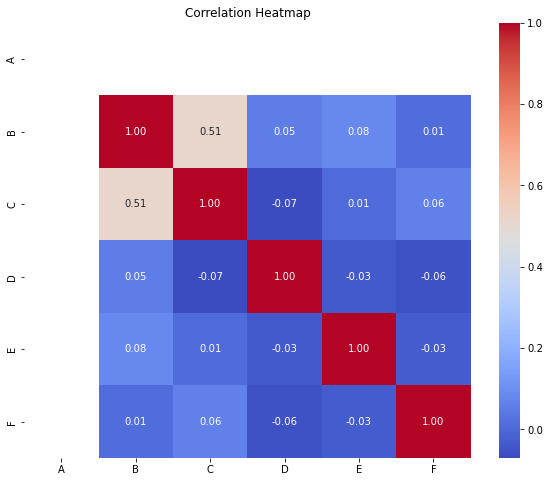

In [251]:
correlation_matrix_A = df_A.corr()

print(correlation_matrix_A)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_A, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [252]:
df['D'].mean()

-0.04934168081693283

D = 1

In [253]:
df_D = pd.read_csv('data_1406.csv')
df_D1 = pd.read_csv('data_1480.csv')
df_D = df_D.append(df_D1)
df_D.drop('Unnamed: 0', axis=1, inplace=True)
df_D

C:\Users\nunni\AppData\Local\Temp\ipykernel_20044\3250566569.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_D = df_D.append(df_D1)


,A,B,C,D,E,F
0,3.000220,-1.002863,0.980499,1.0,-0.086888,1.099187
1,-1.214600,0.259471,-0.044627,1.0,-1.072792,3.226051
2,1.156434,1.235495,2.976434,1.0,1.016944,1.479551
3,-0.397970,0.287625,3.010966,1.0,-0.873716,3.243828
4,0.997328,1.730349,2.804522,1.0,0.728179,1.199116
...,...,...,...,...,...,...
195,1.838425,4.729509,0.917558,1.0,-0.953085,2.341119
196,-0.332760,2.192987,2.541912,1.0,0.793417,2.823550
197,0.755183,0.217716,1.318941,1.0,0.664271,2.974255
198,0.873320,-1.921934,1.510805,1.0,-0.949976,1.247723


          A         B         C   D         E         F
A  1.000000 -0.331249 -0.060255 NaN  0.019916 -0.708168
B -0.331249  1.000000  0.464737 NaN -0.022242  0.279217
C -0.060255  0.464737  1.000000 NaN  0.010765  0.024030
D       NaN       NaN       NaN NaN       NaN       NaN
E  0.019916 -0.022242  0.010765 NaN  1.000000  0.025251
F -0.708168  0.279217  0.024030 NaN  0.025251  1.000000


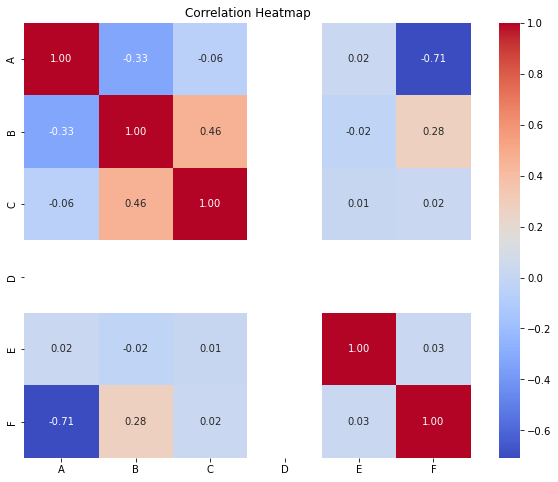

In [254]:
correlation_matrix_D = df_D.corr()

print(correlation_matrix_D)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_D, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

Når D = 1, så er A og B correlerede, B og C er correlede, A og F er correlede og B og F er correlerede 

In [255]:
df['F'].mean()

2.0759278411767736

F = 1

In [256]:
df_F = pd.read_csv('data_1407.csv')
df_F1 = pd.read_csv('data_1482.csv')
df_F = df_F.append(df_F1)
df_F.drop('Unnamed: 0', axis=1, inplace=True)
df_F

C:\Users\nunni\AppData\Local\Temp\ipykernel_20044\1463484388.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_F = df_F.append(df_F1)


,A,B,C,D,E,F
0,1.526784,1.492519,2.908506,0.740211,-0.866081,1.0
1,4.243893,-2.951891,2.731560,-2.157533,1.247871,1.0
2,-0.565053,-1.168048,-1.124283,-0.067510,-0.205328,1.0
3,0.785427,0.133641,1.829099,0.045711,-0.047005,1.0
4,1.716037,1.686283,3.973878,-1.249818,-1.185936,1.0
...,...,...,...,...,...,...
195,2.719803,-1.951032,2.421853,0.269706,-1.162363,1.0
196,1.622034,-3.504682,0.218273,-0.135583,0.845705,1.0
197,-0.045679,-2.645037,1.984670,0.212010,1.171290,1.0
198,0.497672,0.866258,2.042167,0.628527,-0.906685,1.0


          A         B         C         D         E   F
A  1.000000 -0.202106  0.044191 -0.022248  0.027729 NaN
B -0.202106  1.000000  0.403216  0.007547 -0.030637 NaN
C  0.044191  0.403216  1.000000  0.018110 -0.039891 NaN
D -0.022248  0.007547  0.018110  1.000000 -0.006247 NaN
E  0.027729 -0.030637 -0.039891 -0.006247  1.000000 NaN
F       NaN       NaN       NaN       NaN       NaN NaN


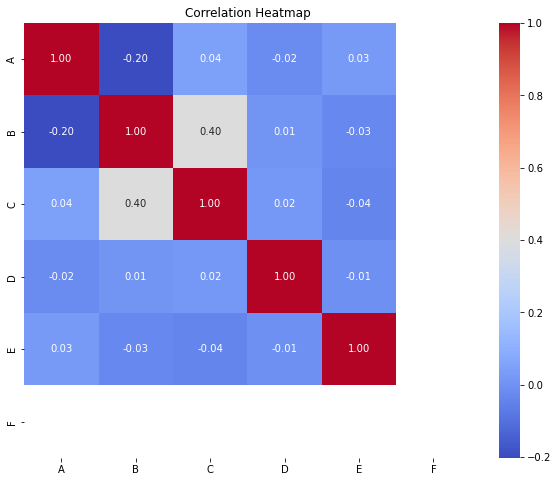

In [257]:
correlation_matrix_F = df_F.corr()

print(correlation_matrix_F)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_F, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

B = 1

In [258]:
df_B = pd.read_csv('data_1412.csv')
df_B1 = pd.read_csv('data_1478.csv')
df_b = df_B.append(df_B1)
df_B.drop('Unnamed: 0', axis=1, inplace=True)
df_B

C:\Users\nunni\AppData\Local\Temp\ipykernel_20044\3074107585.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_b = df_B.append(df_B1)


,A,B,C,D,E,F
0,-1.587196,1.0,2.656747,-0.326987,1.257080,4.315013
1,1.644088,1.0,-0.352483,0.864324,0.848989,1.506807
2,0.625930,1.0,0.782362,-1.041457,-0.917211,2.946557
3,-0.995705,1.0,0.413379,0.043643,1.008178,1.327968
4,5.202908,1.0,2.898339,-0.445085,-1.067858,2.808265
...,...,...,...,...,...,...
95,-0.564343,1.0,2.352456,-0.148682,0.407717,1.516897
96,-1.262197,1.0,3.362483,-1.313103,0.945159,4.791276
97,-1.197879,1.0,3.517099,-0.009833,-0.134895,1.795481
98,3.463757,1.0,1.671403,1.531035,-1.041429,1.199368


          A   B         C         D         E         F
A  1.000000 NaN  0.038615  0.186856  0.133564 -0.320108
B       NaN NaN       NaN       NaN       NaN       NaN
C  0.038615 NaN  1.000000  0.114917 -0.040151  0.176275
D  0.186856 NaN  0.114917  1.000000  0.073224 -0.034602
E  0.133564 NaN -0.040151  0.073224  1.000000  0.063612
F -0.320108 NaN  0.176275 -0.034602  0.063612  1.000000


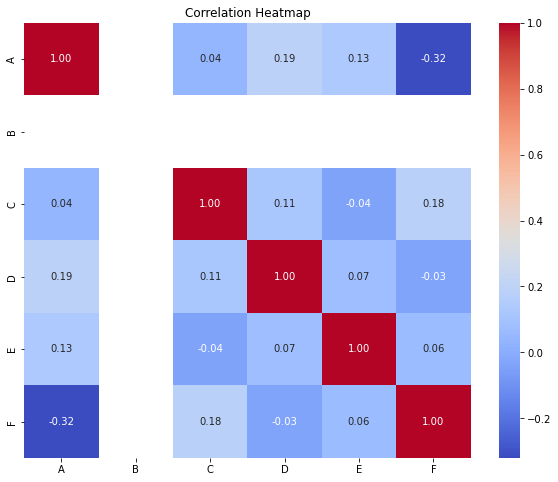

In [259]:
correlation_matrix_B = df_B.corr()

print(correlation_matrix_B)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_B, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [260]:
df_C = pd.read_csv('data_1458.csv')
df_C1 = pd.read_csv('data_1479.csv')
df_C = df_C.append(df_C1)
df_C.drop('Unnamed: 0', axis=1, inplace=True)
df_C

C:\Users\nunni\AppData\Local\Temp\ipykernel_20044\3067474891.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_C = df_C.append(df_C1)


,A,B,C,D,E,F
0,5.559707,-1.526179,1.0,0.163805,0.183761,-1.083184
1,0.173775,0.636643,1.0,0.017470,1.075254,2.709725
2,1.611626,-0.661706,1.0,-0.823036,0.799621,1.589137
3,4.061508,-2.272643,1.0,0.085153,0.143421,-0.692938
4,-1.525125,0.866128,1.0,-0.287368,0.045313,2.147436
...,...,...,...,...,...,...
195,4.346174,2.579396,1.0,-0.424597,0.212073,0.216304
196,-1.599087,0.056090,1.0,0.000148,-0.100056,3.077356
197,-0.355608,1.545192,1.0,-0.244403,-1.097994,2.448793
198,0.234592,0.304874,1.0,0.016089,0.769576,1.649232


In [261]:
df_E = pd.read_csv('data_1458.csv')
df_E1 = pd.read_csv('data_1481.csv')
df_E.drop('Unnamed: 0', axis=1, inplace=True)
df_E

,A,B,C,D,E,F
0,5.559707,-1.526179,1.0,0.163805,0.183761,-1.083184
1,0.173775,0.636643,1.0,0.017470,1.075254,2.709725
2,1.611626,-0.661706,1.0,-0.823036,0.799621,1.589137
3,4.061508,-2.272643,1.0,0.085153,0.143421,-0.692938
4,-1.525125,0.866128,1.0,-0.287368,0.045313,2.147436
...,...,...,...,...,...,...
95,8.637468,-0.790665,1.0,-0.879713,1.017822,2.581341
96,-0.369059,-1.519934,1.0,-0.042603,0.108147,0.855257
97,1.346661,3.017624,1.0,-0.283680,-0.870983,-0.134979
98,-1.389122,-0.312548,1.0,-0.077799,-0.925882,1.910362


In [262]:
df_DminusF = pd.read_csv('data_1466.csv')
df_DminusF.drop('Unnamed: 0', axis=1, inplace=True)
df_DminusF

,A,B,C,D,E,F
0,2.114780,1.165153,2.873889,-1.0,1.492018,1.0
1,1.990871,-2.587674,1.131346,-1.0,0.083305,1.0
2,2.122048,1.510539,3.683755,-1.0,-0.997998,1.0
3,3.955518,-0.967991,2.606943,-1.0,1.223190,1.0
4,1.910396,-0.052663,2.744349,-1.0,-0.669100,1.0
...,...,...,...,...,...,...
95,1.992341,1.074240,1.507698,-1.0,0.929947,1.0
96,2.040540,-0.081458,2.561910,-1.0,0.855429,1.0
97,1.607213,-0.644520,3.181355,-1.0,-1.260398,1.0
98,2.681678,0.035062,2.360530,-1.0,0.998685,1.0


In [263]:
df_DF = pd.read_csv('data_1467.csv')
df_DF.drop('Unnamed: 0', axis=1, inplace=True)
df_DF

,A,B,C,D,E,F
0,3.040254,-1.360622,1.362274,1.0,0.153009,1.0
1,3.077103,1.255561,0.929316,1.0,-0.898873,1.0
2,2.361398,5.889313,2.764003,1.0,1.274724,1.0
3,2.941626,-0.903547,-1.277315,1.0,-1.102596,1.0
4,2.110954,-4.619523,1.279858,1.0,-1.398524,1.0
...,...,...,...,...,...,...
95,3.813531,0.059061,2.472549,1.0,0.150433,1.0
96,1.238642,0.870049,3.118737,1.0,0.719687,1.0
97,1.687526,-0.493384,3.332728,1.0,1.115946,1.0
98,2.163237,-0.498598,2.570841,1.0,1.111145,1.0


In [264]:
# make a table of the mean of each column for each df_* 
table_mean = pd.concat([df.mean(), df_A.mean(), df_D.mean(), df_F.mean(), df_B.mean(), df_C.mean(), df_DF.mean(), df_DminusF.mean()], axis=1)
table_mean.columns = ['df', 'df_A', 'df_D', 'df_F', 'df_B', 'df_C', 'df_DF', 'df_DminusF']
table_mean

,df,df_A,df_D,df_F,df_B,df_C,df_DF,df_DminusF
A,0.362933,1.000000,1.501904,1.409663,0.402995,0.386101,2.404831,2.583010
B,0.380715,0.056676,-0.193794,-0.014142,1.000000,0.257222,-0.456154,-0.276572
C,1.801682,1.815680,1.539989,1.802669,1.408289,1.000000,1.813632,1.767273
D,-0.049342,-0.005545,1.000000,-0.028527,0.077198,-0.042680,1.000000,-1.000000
E,-0.005730,-0.064541,-0.063867,0.028712,0.020843,0.004507,-0.176684,0.033086
F,2.075928,1.978872,2.068255,1.000000,2.046658,2.237521,1.000000,1.000000


In [265]:
from scipy.stats import ttest_ind
 
ttest_AB = ttest_ind(df['A'], df_B['A']) # not significant
ttest_AD = ttest_ind(df['A'], df_D['A']) # not significant
ttest_AF = ttest_ind(df['A'], df_F['A']) # significant

ttest_AB, ttest_AD, ttest_AF

(TtestResult(statistic=-0.18129815433278546, pvalue=0.8562258453989018, df=398.0),
 TtestResult(statistic=-6.77185325475541, pvalue=3.044640193655038e-11, df=598.0),
 TtestResult(statistic=-7.090535452689409, pvalue=3.78338250866792e-12, df=598.0))

In [266]:
ttest_BA = ttest_ind(df['B'], df_A['B']) # not significant
ttest_BD = ttest_ind(df['B'], df_D['B']) # significant
ttest_BF = ttest_ind(df['B'], df_F['B']) # significant

ttest_BA, ttest_BD, ttest_BF

(TtestResult(statistic=2.3613866402452914, pvalue=0.018526417346764083, df=598.0),
 TtestResult(statistic=4.18887905143108, pvalue=3.226005667505604e-05, df=598.0),
 TtestResult(statistic=2.9042099414733094, pvalue=0.0038177732469671286, df=598.0))

In [267]:
ttest_CA = ttest_ind(df['C'], df_A['C']) # not significant
ttest_CB = ttest_ind(df['C'], df_B['C']) # significant
ttest_CD = ttest_ind(df['C'], df_D['C']) # significant
ttest_CF = ttest_ind(df['C'], df_F['C']) # significant

ttest_CA, ttest_CB, ttest_CD, ttest_CF

(TtestResult(statistic=-0.13257223631520273, pvalue=0.8945762861270332, df=598.0),
 TtestResult(statistic=2.489161289516268, pvalue=0.013212132119494078, df=398.0),
 TtestResult(statistic=2.385053996907305, pvalue=0.017387135246596498, df=598.0),
 TtestResult(statistic=-0.00924428717072167, pvalue=0.9926273140878085, df=598.0))

In [268]:
ttest_DA = ttest_ind(df['D'], df_A['D']) # not significant
ttest_DB = ttest_ind(df['D'], df_B['D']) # not significant
ttest_DF = ttest_ind(df['D'], df_F['D']) # not significant

ttest_DA, ttest_DB, ttest_DF

(TtestResult(statistic=-0.8376840118615971, pvalue=0.40254286128110983, df=598.0),
 TtestResult(statistic=-1.6567388159399472, pvalue=0.09836036072402714, df=398.0),
 TtestResult(statistic=-0.39608603042018087, pvalue=0.6921828458397459, df=598.0))

In [269]:
ttest_EA = ttest_ind(df['E'], df_A['E']) # not significant
ttest_EB = ttest_ind(df['E'], df_B['E']) # not significant
ttest_ED = ttest_ind(df['E'], df_D['E']) # not significant
ttest_EF = ttest_ind(df['E'], df_F['E']) # not significant

ttest_EA, ttest_EB, ttest_ED, ttest_EF

(TtestResult(statistic=0.873076146892544, pvalue=0.3829720148350192, df=598.0),
 TtestResult(statistic=-0.273740835189057, pvalue=0.7844257984042027, df=398.0),
 TtestResult(statistic=0.8432564997980515, pvalue=0.3994221689738312, df=598.0),
 TtestResult(statistic=-0.5031951389279519, pvalue=0.6150123678509933, df=598.0))

In [270]:
ttest_FA = ttest_ind(df['F'], df_A['F']) # not significant
ttest_FB = ttest_ind(df['F'], df_B['F']) # not significant
ttest_FD = ttest_ind(df['F'], df_D['F']) # not significant

ttest_FA, ttest_FB, ttest_FC, ttest_FD

(TtestResult(statistic=0.88319806166539, pvalue=0.37748417816188484, df=598.0),
 TtestResult(statistic=0.1883363470462468, pvalue=0.8507089843656985, df=398.0),
 TtestResult(statistic=-1.216558834275313, pvalue=0.22522031982601629, df=198.0),
 TtestResult(statistic=0.06619110086689287, pvalue=0.9472478042309334, df=598.0))

In [271]:
ttest_AC = ttest_ind(df['A'], df_C['A']) # not significant
ttest_BC = ttest_ind(df['B'], df_C['B']) # not significant
ttest_DC = ttest_ind(df['D'], df_C['D']) # not significant
ttest_EC = ttest_ind(df['E'], df_C['E']) # not significant
ttest_FC = ttest_ind(df['F'], df_C['F']) # significant

ttest_AC, ttest_BC, ttest_DC, ttest_EC, ttest_FC

(TtestResult(statistic=-0.14671906875907995, pvalue=0.8834032147487874, df=598.0),
 TtestResult(statistic=0.9034159544086138, pvalue=0.3666689442356811, df=598.0),
 TtestResult(statistic=-0.11542894094633163, pvalue=0.9081438893841762, df=598.0),
 TtestResult(statistic=-0.14599673952162695, pvalue=0.8839731618618398, df=598.0),
 TtestResult(statistic=-1.431165138136597, pvalue=0.15290526610315255, df=598.0))

In [272]:
ttest_AE = ttest_ind(df['A'], df_E['A']) # not significant
ttest_BE = ttest_ind(df['B'], df_E['B']) # not significant
ttest_CE = ttest_ind(df['C'], df_E['C']) # significant
ttest_DE = ttest_ind(df['D'], df_E['D']) # not significant
ttest_FE = ttest_ind(df['F'], df_E['F']) # significant

ttest_AE, ttest_BE, ttest_CE, ttest_DE, ttest_FE

c:\Users\nunni\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


(TtestResult(statistic=-0.4569423582863741, pvalue=0.6479617695090276, df=398.0),
 TtestResult(statistic=0.7573457197128058, pvalue=0.4492909009645376, df=398.0),
 TtestResult(statistic=6.164316356112351, pvalue=1.7379196511823112e-09, df=398.0),
 TtestResult(statistic=1.0681143326757936, pvalue=0.28611635878734576, df=398.0),
 TtestResult(statistic=-1.2048122581589467, pvalue=0.22899170320404066, df=398.0))

In [273]:
ttest_DFA = ttest_ind(df['A'], df_DF['A']) # significant
ttest_DFB = ttest_ind(df['B'], df_DF['B']) # significant
ttest_DFC = ttest_ind(df['C'], df_DF['C']) # significant
ttest_DFE = ttest_ind(df['E'], df_DF['E']) # significant


ttest_DFA, ttest_DFB, ttest_DFC, ttest_DFE

(TtestResult(statistic=-9.492083980033431, pvalue=2.1256243007263614e-19, df=398.0),
 TtestResult(statistic=4.326236193033209, pvalue=1.9203526838671737e-05, df=398.0),
 TtestResult(statistic=-0.07731161996096479, pvalue=0.9384144974996149, df=398.0),
 TtestResult(statistic=1.7728698499028996, pvalue=0.0770150677000548, df=398.0))

In [274]:
ttest_D_FA = ttest_ind(df['A'], df_DminusF['A']) # significant
ttest_D_FB = ttest_ind(df['B'], df_DminusF['B']) # significant
ttest_D_FC = ttest_ind(df['C'], df_DminusF['C']) # significant
ttest_D_FE = ttest_ind(df['E'], df_DminusF['E']) # not significant


ttest_D_FA, ttest_D_FB, ttest_D_FC, ttest_D_FE

(TtestResult(statistic=-10.325799350497583, pvalue=2.6409555303682413e-22, df=398.0),
 TtestResult(statistic=3.4288571052536305, pvalue=0.0006694368028231672, df=398.0),
 TtestResult(statistic=0.21855217891433731, pvalue=0.8271109295988657, df=398.0),
 TtestResult(statistic=-0.40059313210340275, pvalue=0.6889346510367127, df=398.0))

In [275]:
# make a table containing all the pvalues from the t-test results
table_ttest = pd.DataFrame({'A': ['Nan', ttest_AB.pvalue, ttest_AC.pvalue, ttest_AD.pvalue, ttest_AE.pvalue, ttest_AF.pvalue, ttest_D_FA.pvalue, ttest_DFA.pvalue],
                            'B': [ttest_BA.pvalue, 'Nan', ttest_BC.pvalue, ttest_BD.pvalue, ttest_BE.pvalue, ttest_BF.pvalue, ttest_D_FB.pvalue, ttest_DFB.pvalue],
                            'C': [ttest_CA.pvalue, ttest_CB.pvalue, 'Nan', ttest_CD.pvalue, ttest_CE.pvalue, ttest_CF.pvalue,  ttest_D_FC.pvalue, ttest_DFC.pvalue],
                            'D': [ttest_DA.pvalue, ttest_DB.pvalue, ttest_DC.pvalue, 'Nan', ttest_DE.pvalue, ttest_DF.pvalue, 'Nan', 'Nan'],
                            'E': [ttest_EA.pvalue, ttest_EB.pvalue, ttest_EC.pvalue, ttest_ED.pvalue, 'Nan', ttest_EF.pvalue, ttest_D_FE.pvalue, ttest_DFE.pvalue],
                            'F': [ttest_FA.pvalue, ttest_FB.pvalue, ttest_FC.pvalue, ttest_FD.pvalue, ttest_FE.pvalue, 'Nan', 'Nan', 'Nan'],},
                           index=['A = 1', 'B = 1', 'C = 1', 'D = 1', 'E = 1', 'F = 1', 'D = -1, F = 1', 'D = 1, F = 1'])

table_ttest

,A,B,C,D,E,F
A = 1,Nan,0.018526,0.894576,0.402543,0.382972,0.377484
B = 1,0.856226,Nan,0.013212,0.09836,0.784426,0.850709
C = 1,0.883403,0.366669,Nan,0.908144,0.883973,0.152905
D = 1,0.0,0.000032,0.017387,Nan,0.399422,0.947248
E = 1,0.647962,0.449291,0.0,0.286116,Nan,0.228992
F = 1,0.0,0.003818,0.992627,0.692183,0.615012,Nan
"D = -1, F = 1",0.0,0.000669,0.827111,Nan,0.688935,Nan
"D = 1, F = 1",0.0,0.000019,0.938414,Nan,0.077015,Nan


In [276]:
# A ændrer sig mærkant når F sættes til 1, men F ændrer sig ikke mærkbart når A sættes til 1
# B ændrer sig mærkant når både D og F sættes til 1, hverken D eller F ændrer sig mærkbart når B sættes til 1
# C ændrer sig mærkant når både B, D og F sættes til 1, F ændrer sig når C sættes til 1
# Når E ændres til 1, ændre F sig significant 

In [277]:
# make a table of the var of each column for each df_*
table_var = pd.concat([df.var(), df_A.var(), df_D.var(), df_F.var(), df_B.var()], axis=1)
table_var.columns = ['df', 'df_A', 'df_D', 'df_F', 'df_B']
table_var

,df,df_A,df_D,df_F,df_B
A,3.994211,0.000000,4.492341,2.543600,2.659382
B,2.789395,2.859735,2.853722,2.756140,0.000000
C,1.688525,1.656335,1.923150,1.732334,2.431369
D,0.432066,0.388004,0.000000,0.396451,0.454040
E,0.702615,0.658622,0.723352,0.702902,0.719302
F,1.919415,1.703433,2.111837,0.000000,1.485499
